Numarul de angajati: 1000.

    First Name Gender Start Date Last Login Time  Salary  Bonus %  \
0      Douglas   Male   8/6/1993        12:42 PM   97308    6.945   
217    Douglas   Male   9/3/1999         4:00 PM   83341    1.015   
322    Douglas   Male   1/8/2002         6:42 PM   41428   14.372   
667    Douglas    NaN   2/4/2009         2:03 AM  104496   14.771   
835    Douglas   Male   8/4/2007         5:23 AM  132175    2.280   

    Senior Management             Team  
0                True        Marketing  
217              True  Client Services  
322             False          Product  
667              True        Marketing  
835             False      Engineering  
Numarul proprietatilor 8 si tipul proprietarilor salvate ['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary', 'Bonus %', 'Senior Management', 'Team'].

Numarul de angajati pentru care sunt inregistrate toate datele: 764.

Minim, mediu, maxim pentru fiecare field numeric
 {'Salary': {'min': 35013

/tmp/ipykernel_474189/463172491.py:106: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  employees_df.fillna({'First Name' : "",


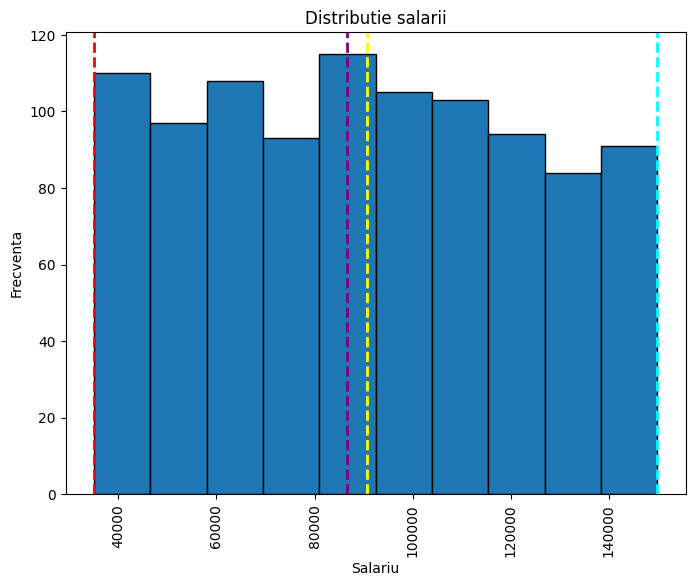

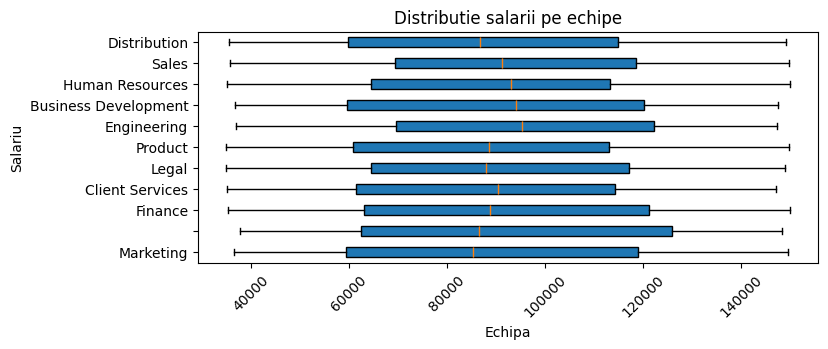

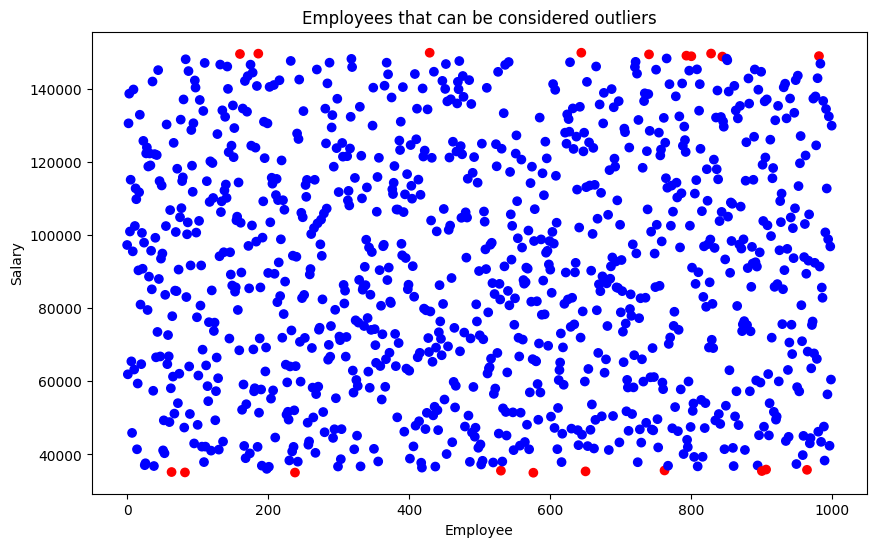

Outliers (angajatii cu salariu in top 1%)

    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
63     Matthew    Male    1/2/2013        10:33 PM   35203   18.040   
82      Steven    Male   3/30/1980         9:20 PM   35095    8.379   
160      Kathy  Female   3/18/2000         7:26 PM  149563   16.991   
186             Female   2/23/2005         9:50 PM  149654    1.825   
238      Kevin    Male   3/25/1982         7:31 AM   35061    5.128   
429       Rose  Female   5/28/2015         8:40 AM  149903    5.630   
530   Kathleen  Female   6/13/2014         9:16 AM   35575   14.595   
576    Michael    Male   7/30/1993         5:35 PM   35013   14.879   
644  Katherine  Female   8/13/1996        12:21 AM  149908   18.912   
650    Cynthia  Female    7/5/1986         1:24 AM   35381   11.749   
740    Russell            5/9/2009        11:59 AM  149456    3.533   
762      Terry    Male  11/10/2004         4:33 AM   35633    3.947   
793     Andrea  Female   7/22/1999

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def load_employees(file_name: str):
    '''
        Returns a pandas DataFrame containing employee data from a csv file.
        
        @param file_name: The file that contains data about the employees.
    '''
    employees_df = pd.read_csv(file_name)

    return employees_df

def search_for_employee_by_first_name(employee_first_name: str, employees_df: pd.DataFrame) -> pd.DataFrame:
    '''
        Returns a pandas DataFrame 
        that contains on the 'First Name' column the value 'employee_first_name'.
        
        @param employee_first_name: The first name of the employee.
        @param employee_df: A pandas DataFrame containing data about the employees.
    '''
    print(employees_df.loc[employees_df['First Name'] == employee_first_name])
    
    return employees_df.loc[employees_df['First Name'] == employee_first_name]

def data_of_employee(employee_first_name: str, employees_df: pd.DataFrame) -> tuple:
    '''
        Returns a tuple containing the number of non-null properties of an employee
        and the name of the saved properties of an employee.
        
        @param employee_first_name: The first name of the employee.
        @param employee_df: A pandas DataFrame containing data about the employees.
    '''
    
    employee = search_for_employee_by_first_name(employee_first_name, employees_df)
    
    if employee.empty:
        return 0, []
    
    number_of_properties = len(employee.columns)
    properties = list(employee.columns)
    
    return number_of_properties, properties

def employees_with_complete_properties(employees_df: pd.DataFrame) -> int:
    '''
        Returns the number of employees that have all properties saved.
        
        @param employees_df: A pandas DataFrame containing data about employees.
    '''
    no_employees = 0
    
    for _, employee in employees_df.iterrows():
        # Check if the employee has no null columns
        if not employee.isnull().any():
            no_employees += 1
            
    return no_employees

def compute_stats(employees_df: pd.DataFrame) -> dict:
    '''
        Computes statistics data for the numerical properties saved for the employees.
        
        @param employees_df: A pandas DataFrame containing data about employees.
    '''
    
    stats = {}

    for column in employees_df.columns:
        if pd.api.types.is_numeric_dtype(employees_df[column]):
            stats[column] = employees_df[column].agg(['min', 'mean', 'max']).to_dict()

    return stats

def all_possible_values_number(employees_df: pd.DataFrame) -> dict:
    '''
        Computes all possible values for the non-numeric properties saved for the employees.
        
        @param employees_df: A pandas DataFrame containing data about employees.
    '''
    
    stats = {}
    
    for column in employees_df.columns:
        if not pd.api.types.is_numeric_dtype(employees_df[column]):
            stats[column] = len(employees_df[column].unique())
    
    return stats

def handle_missing_data(employees_df: pd.DataFrame):
    '''
        Handles the missing data for the properties of the employees
        by replacing the None values with default ones.
        
        @param employees_df: A pandas DataFrame containing data about employees.
    '''
    
    # Stergere inregistrari care au date lipsa -> pierdere de date
    
    # Asignarea datelor lipsa cu datele precedente folosind forward fill -> useful daca avem date intr-o ordine logica
    
    # Algoritm ML pentru aproximarea valorilor lipsa -> nu stiu
    
    # Metoda aleasa: asignare cu valoare implicita pentru fiecare tip de data
    
    employees_df.fillna({'First Name' : "", 
                         'Gender': "", 
                         'Start Date' : "1/1/2000", 
                         'Last Login Time' : "00:00 AM", 
                         'Salary' : 0,
                         'Bonus %' : 0.0, 
                         'Senior Management' : False, 
                         'Team' : ""}, inplace=True)

# Vizualizarea datelor

def salary_distribution(employees_df: pd.DataFrame):
    '''
        Determines the distribution of the salaries.
        
        @param employees_df: A pandas DataFrame containing data about employees.
    '''
    # Afisam si valorile minim, mediu si maxim pentru salariu.
    
    stats = employees_df['Salary'].describe()
    mode = employees_df['Salary'].mode().values[0]
    
    print(f"Valoarea minima a salariului: {employees_df['Salary'].min()}")
    print(f"Valoarea medie a salariului: {employees_df['Salary'].mean()}")
    print(f"Valoarea maxima a salariului: {employees_df['Salary'].max()}")
    print(f"Cea mai frecventa valoare: {mode}")
    
    plt.figure(figsize=(8, 6))
    
    plt.axvline(stats['min'],   color='red',    linestyle='dashed', linewidth=2)
    plt.axvline(stats['mean'],  color='yellow',  linestyle='dashed', linewidth=2)
    plt.axvline(stats['max'],   color='cyan',   linestyle='dashed', linewidth=2)
    plt.axvline(mode,           color='purple',    linestyle='dashed', linewidth=2)
    
    plt.hist(employees_df['Salary'], bins=10, edgecolor='black')
    
    plt.title('Distributie salarii')
    plt.xlabel('Salariu')
    plt.ylabel('Frecventa')
    
    plt.xticks(rotation=90)
    
    plt.show()

def salary_team_distribution(employees_df: pd.DataFrame, salary_col="Salary", team_col="Team"):
    '''
        Determines the distribution of the salaries on each team.
        
        @param employees_df: A pandas DataFrame containing data about employees.
        @param salary_col: The column that saves the salary for each employee.
        @param team_col: The column that saves the team for each employee.
    '''
    # Initiem un boxplot pentru a grupa echipele pe intervalele de salarii
    
    teams = employees_df[team_col].unique()
    data = [employees_df.loc[employees_df[team_col] == team, salary_col] for team in teams]
    
    plt.figure(figsize=(8, 3))
    
    plt.boxplot(data, vert=False, patch_artist=True)
    plt.yticks(range(1, len(teams) + 1), teams)
    
    plt.title("Distributie salarii pe echipe")
    plt.xlabel("Echipa")
    plt.ylabel("Salariu")
    
    plt.xticks(rotation=45)
    
    plt.show()
    
def outlier_employees(employees_df: pd.DataFrame):
    '''
        Determines the outliers of the relation.
        I've chosen to consider the outliers the Top 1% employees with the biggest salaries.
    
        @param employees_df: A pandas DataFrame containing data about employees.
    '''
    
    # Angajatii cu un salariu foarte mare sau foarte mic pot fi outlieri, pentru ca pot exista foarte putini in raport cu toti angajatii
    # -> Angajatii cu salariu in top 1%
    
    too_big_salary = employees_df['Salary'].quantile(0.99)
    too_small_salary = employees_df['Salary'].quantile(0.01)
    
    employees_df['outlier'] = ((employees_df['Salary'] > too_big_salary) |
                               (employees_df['Salary'] < too_small_salary))
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(employees_df.index, employees_df['Salary'],
                c=employees_df['outlier'].map({False: 'blue', True: 'red'}))
    
    plt.title("Employees that can be considered outliers")
    plt.xlabel("Employee")
    plt.ylabel("Salary")
    
    plt.show()
    
    return employees_df[employees_df['outlier'] == True]

def main():    
    # Numarul de angajati
    employees_df = load_employees("./data/employees.csv")
    print(f"Numarul de angajati: {len(employees_df)}.\n")
    
    # Numarul si tipul proprietatilor salvate pt fiecare angajat
    employee_first_name = 'Douglas'
    number_of_properties_employee, properties_employee = data_of_employee(employee_first_name, employees_df)
    
    if number_of_properties_employee != 0:
        print(f"Numarul proprietatilor {number_of_properties_employee} si tipul proprietarilor salvate {properties_employee}.\n")
    else:
        print(f"Nu exista angajatul cu numele '{employee_first_name}'.\n")
        
    # Numarul de angajati pentru care sunt inregistrate toate datele
    print(f"Numarul de angajati pentru care sunt inregistrate toate datele: {employees_with_complete_properties(employees_df)}.\n")
        
    # Minim, mediu, maxim pentru fiecare field numeric
    print(f"Minim, mediu, maxim pentru fiecare field numeric\n {compute_stats(employees_df)}\n")
    
    # Numarul de valori posibile pentru fiecare proprietate nenumerica
    print(f"Numarul de valori posibile pentru fiecare proprietate nenumerica\n {all_possible_values_number(employees_df)}\n")
    
    # Datele dupa ce am scapat de coloane lipsa
    handle_missing_data(employees_df)
    print("Datele dupa ce am scapat de datele lipsa\n")
    print(employees_df)
    
    # Vizualizarea datelor
    
    # Distributia salariilor
    salary_distribution(employees_df)
    
    # Distributia salariilor pe echipe
    salary_team_distribution(employees_df)
    
    # Outliers
    outliers = outlier_employees(employees_df)
    print("Outliers (angajatii cu salariu in top 1%)\n")
    print(outliers)
    
main()

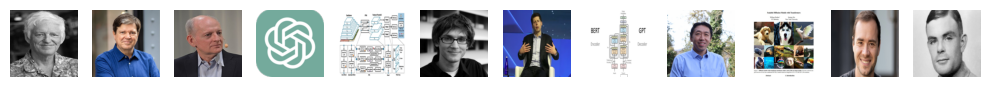

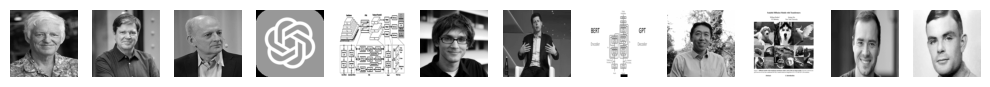

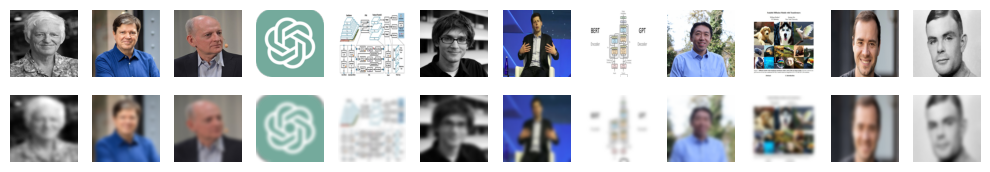

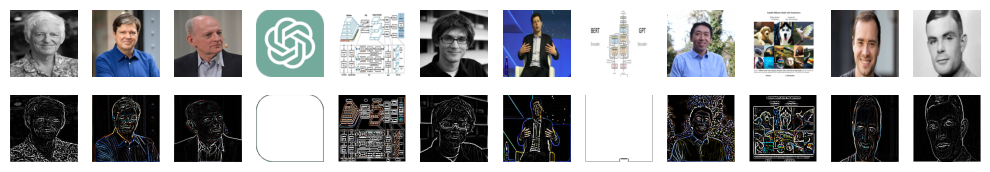

In [3]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import os

def get_images(path: str) -> list:
    images = []
    
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        img = Image.open(filepath)
        
        images.append(img)
    
    return images

def resize_images(images: list) -> list:
    for index, image in enumerate(images):
        images[index] = image.resize((128, 128))
        
    return images

def show_images_in_table(images: list):
    # Creating 1 row with len(images) cells.
    _, axis = plt.subplots(1, len(images), figsize=(10, 10))
    
    # Iterating all the cells of the axis, and interpreting the data as an image.
    for index, elem in enumerate(axis):
        if images[index].mode == 'L':
            elem.imshow(images[index], cmap='gray')
        else:
            elem.imshow(images[index])
        elem.axis("off")
    
    # Encapsulating the cells in the figsize.
    plt.tight_layout()
    
    plt.show()    
        
def gray_levels_images(images: list) -> list:
    gray_images = [None] * len(images)
    
    # Gray scaling each image.
    for index, image in enumerate(images):
        gray_images[index] = image.convert('L')
        
    return gray_images
        
def init_axis(axis, axis_index: int, images: list):
    for index, elem in enumerate(axis[axis_index]):
        if images[index].mode == 'L':
            elem.imshow(images[index], cmap='gray')
        else:
            elem.imshow(images[index])
        elem.axis("off")            

def blur_images_before_after(images: list):
    blurred_images = [None] * len(images)
    
    # Blurring each image.
    for index, image in enumerate(images):
        blurred_images[index] = image.filter(ImageFilter.GaussianBlur(radius=3))
    
    _, axis = plt.subplots(2, len(images), figsize=(10, 2))
    
    init_axis(axis, 0, images)
    init_axis(axis, 1, blurred_images)
    
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    plt.show()

def edge_images_before_after(images: list):
    edge_images = [None] * len(images)
    
    # Finding the edges for each image
    for index, image in enumerate(images):
        edge_images[index] = image.filter(ImageFilter.FIND_EDGES)
    
    _, axis = plt.subplots(2, len(images), figsize=(10, 2))
    
    init_axis(axis, 0, images)
    init_axis(axis, 1, edge_images)
    
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    plt.show()
    
def main():
    # Printing one photos.
    images = get_images("data/images")
    #images[0].show()
    
    # Resizing the photos and putting them in a tabular form.
    images = resize_images(images)
    show_images_in_table(images)
    
    # Transforming the images in gray-levels.
    gray_images = gray_levels_images(images)
    show_images_in_table(gray_images)
    
    # Before and after blurring.
    blur_images_before_after(images)
    
    # Before and after finding the edges.
    edge_images_before_after(images)
        
main()

In [6]:
import spacy

import unidecode

from googletrans import Translator

import nltk
from nltk.corpus import wordnet

def read_text(path: str) -> str:
    text = ""
    with open(path, 'r') as file:
        text = file.read()
    return text

def process_text(nlp, text: str):
    return nlp(text)

def get_sentences(doc):
    sentences = []
    
    for sentence in doc.sents:
        sentence_str = str(sentence).strip()
        
        if sentence_str:
            sentences.append(sentence_str)
    
    return sentences

def get_words(doc) -> dict[str, int]:
    words = {}
    
    for token in doc:
        if not (token.is_punct or token.is_digit or token.is_space):
            word = str(token).strip()
        
            words[word] = words.get(word, 0) + 1
        
    return words

def longest_shortest_word(words: list) -> tuple:
    if not words:
        return "", ""
    
    longest_word = max(words, key = len)
    shortest_word = min(words, key = len)
    
    return longest_word, shortest_word

def text_without_diacritics(doc) -> str:
    return unidecode.unidecode(doc.text)

def lemmatize_word(word: str, nlp):
    doc = nlp(word)
    
    lemma = doc[0].lemma_
    
    return str(lemma).strip()

def synonyms_for_word(word: str) -> set:
    translator = Translator()
    
    translation = translator.translate(word, src='ro', dest='en').text
    
    if translation == None:
        return set()
    
    synsets = wordnet.synsets(translation)
    synonyms_en = set()
    
    for synset in synsets:
        for lemma in synset.lemmas():
            synonyms_en.add(lemma.name())
    
    synonyms = set()
    for synonym_en in synonyms_en:
        synonym = translator.translate(synonym_en, src='en', dest='ro').text
        synonyms.add(synonym)
    
    return synonyms

def main(nlp):
    # Reading the text.
    text = read_text("data/texts.txt")
    
    # Processing the text.
    doc = process_text(nlp, text)
    
    # Counting the sentences.
    sentences = get_sentences(doc)
    
    print(f"Numarul de propopozitii: {len(sentences)}\n")
    
    # Counting the words.
    words = get_words(doc)
    word_count = sum(value for value in words.values())
    
    print(f"Numarul de cuvinte: {word_count}\n")
    
    # Number of unique words.
    print(f"Numarul de cuvinte diferite din text: {len(words.keys())}\n")
    
    # Longest and shortest words
    longest_word, shortest_word = longest_shortest_word(list(words.keys()))
    print(f"Longest word: '{longest_word}'\nShortest word: '{shortest_word}'\n")
    
    # The text without diacritics
    new_text = text_without_diacritics(doc)
    print(f"Textul fara diacritice\n\n{new_text}")
    
    # Synonims for the longet word
    
    # Lemmatizing the word
    longest_word_lemmatized = lemmatize_word(longest_word, nlp)
    
    synonims_longest_word = synonyms_for_word(longest_word_lemmatized)
    
    print(f"Sinonimele pentru cuvantul '{longest_word_lemmatized}' sunt: {synonims_longest_word}")
    
# Initiating a model with the Romanian language.
nlp = spacy.load('ro_core_news_md')

# Downloading the WordNet data using 'nltk'.
nltk.download('wordnet')

main(nlp)

[nltk_data] Downloading package wordnet to /home/culbec/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Numarul de propopozitii: 10

Numarul de cuvinte: 155

Numarul de cuvinte diferite din text: 93

Longest word: 'laboratoarele'
Shortest word: 'o'

Textul fara diacritice

Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul "general". 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul "Am citit textul pentru problema 3". 
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp

/tmp/ipykernel_474189/2376993785.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[team_col] = encoder.fit_transform(df[team_col])
/tmp/ipykernel_474189/2376993785.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[salary_col, bonus_col, team_col]] = scaler.fit_transform(df[[salary_col, bonus_col, team_col]])


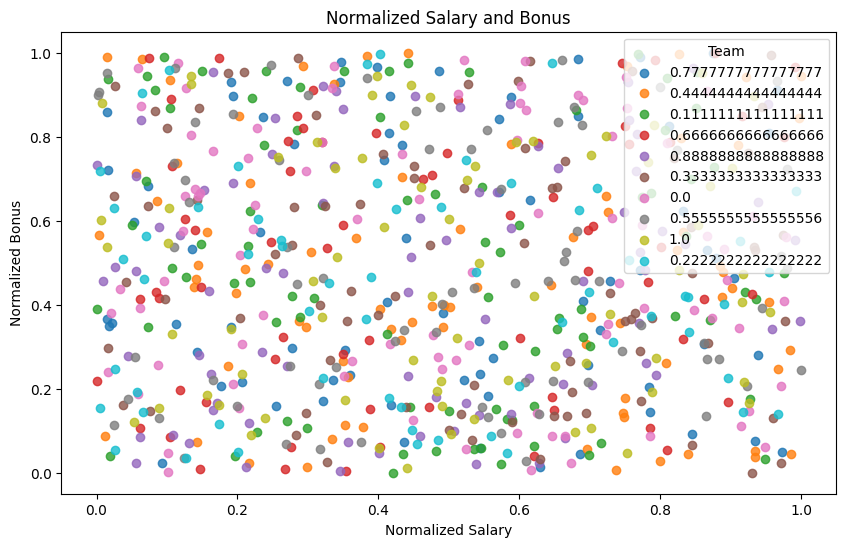

/tmp/ipykernel_474189/2376993785.py:119: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pixels[:, 0], pixels[:, 1], alpha=0.2, c=colors(i))


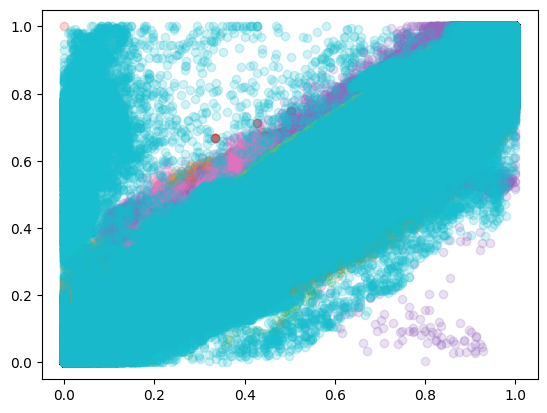

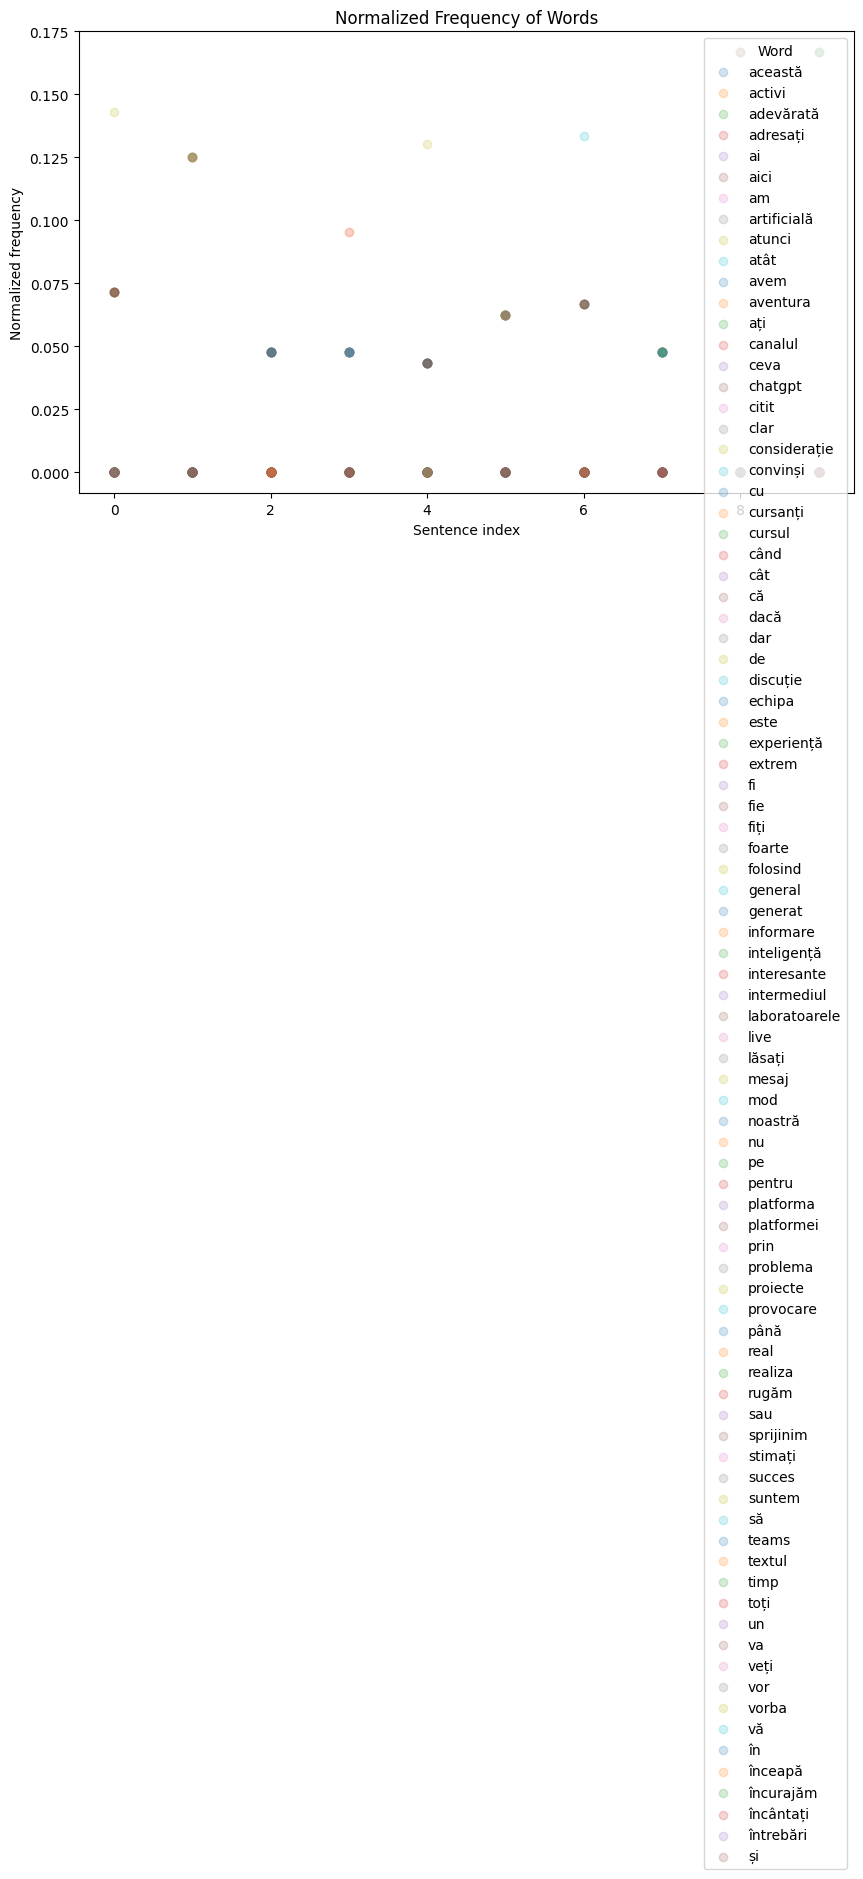

In [7]:
# Normalizarea datelor

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

def load_employees(file_name: str) -> pd.DataFrame:
    '''
        Returns a pandas DataFrame containing employee data from a csv file.
        
        @param file_name: The file that contains data about the employees.
    '''
    df = pd.read_csv(file_name)

    return df

def clear_data_frame(df: pd.DataFrame) -> pd.DataFrame:
    '''
        Clears the data frame by removing all the rows that contain at least a null value.
        
        @param df: A pandas DataFrame containing informations about the employees.
    '''
    
    return df.dropna(axis=0, how='any')

def normalize_data(df: pd.DataFrame, salary_col='Salary', bonus_col='Bonus %', team_col='Team'):
    '''
        Normalizes the salary, bonus and team of the employees using the MinMax method.
        
        xi_new = (xi - min) / (max - min), for i = 1..n
        
        @param df: A pandas DataFrame containing data about the employees.
        @param salary_col: The column that contains the salary of each employee.
        @param bonus_col: The column that contains the bonus of each employee.
        @param team_col: The column that contains the team of each employee.
    '''
    
    # Creating a min-max scaler.
    scaler = preprocessing.MinMaxScaler()
    
    # Creating a label encoder to encode the teams into numerical values.
    encoder = preprocessing.LabelEncoder()
    
    # Encoding the team column.
    df[team_col] = encoder.fit_transform(df[team_col])
    
    # Normalizing the salary and bonus columns, as they are numeric.
    df[[salary_col, bonus_col, team_col]] = scaler.fit_transform(df[[salary_col, bonus_col, team_col]])
    
    # Assigning a color to each team.
    colors = plt.get_cmap('tab10')
    unique_teams = df[team_col].unique()
    color_map = {team: colors(i) for i, team in enumerate(unique_teams)}
    
    # Plotting the normalized data.
    plt.figure(figsize=(10, 6))
    
    for team in unique_teams:
        team_data = df[df[team_col] == team]
        plt.scatter(team_data[salary_col], team_data[bonus_col], c=[color_map[team]], label=team, alpha=0.8)
    
    plt.title('Normalized Salary and Bonus')
    plt.xlabel('Normalized Salary')
    plt.ylabel('Normalized Bonus')
    plt.legend(title='Team')
    plt.show()

from PIL import Image, ImageFilter
import os
import numpy as np

def get_images(path: str) -> list:
    '''
        Opens all images from a folder.
        
        @param path: Path to the folder that contains the images.
    '''
    
    images = []
    
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        img = Image.open(filepath)
        
        images.append(img)
    
    return images

def normalize_pixels(images: list):
    '''
        Normalizes the values of the pixels in each image.
        
        @param images: A list with images.
    '''
    normalized_images = []
    
    for image in images:
        # Convert the image to a numpy float array.
        image_arr = np.array(image)
        image_arr = image_arr.astype('float32')
        
        # Clipping the values of each pixel.
        image_arr /= 255.0
        image_arr = np.clip(image_arr, 0, 1)

        normalized_images.append(image_arr)
    
    # Vizualizing the data.
    
    # Initializing a color map.
    colors = plt.get_cmap('tab10')
    
    for i, norm_img_arr in enumerate(normalized_images):
        # Reshaping the image array into a 2D array on which every row is a pixel.
        pixels = norm_img_arr.reshape(-1, norm_img_arr.shape[-1])
        
        plt.scatter(pixels[:, 0], pixels[:, 1], alpha=0.2, c=colors(i))
    
    plt.show()
    
import spacy

def read_text(path: str) -> str:
    '''
        Reads a text from a file.
        
        @param path: Path to a file.
    '''
    text = ""
    with open(path, 'r') as file:
        text = file.read()
    return text

def process_text(nlp, text: str):
    '''
        Processes a text using a spacy language model.
        
        @param nlp: A spacy language model.
        @parma text: Text to be processed.
    '''
    return nlp(text)

def get_sentences(doc):
    '''
        Returns the sentences in a processed text.
        
        @param doc: The processed format of a text processed by a spacy language model.
    '''
    sentences = []
    
    for sentence in doc.sents:
        sentence_str = str(sentence).strip()
        
        if sentence_str:
            sentences.append(sentence_str)
    
    return sentences
    
def normalize_word_frequency_on_sentences(sentences: list):
    '''
        Normalizes and vizualizes the word frequency in each sentence.
        
        @param sentences: A list of sentences.
    '''
    # Counting the word frequencies from each sentence.
    vectorizer = CountVectorizer()
    word_frequencies = vectorizer.fit_transform(sentences)

    normalized_word_frequencies = preprocessing.normalize(word_frequencies, norm="l1")
    
    # Vizualizing normalized word frequencies
    plt.figure(figsize=(10, 6))
    
    for index, freq in enumerate(normalized_word_frequencies.toarray().T):
        plt.scatter(range(len(sentences)), freq, label=vectorizer.get_feature_names_out()[index], alpha=0.2)
        
    plt.title("Normalized Frequency of Words")
    plt.xlabel("Sentence index")
    plt.ylabel("Normalized frequency")
    plt.legend(title="Word")
    plt.show()
    
def main(nlp):
    # Loading the employees
    employee_file = "data/employees.csv"
    df = load_employees(employee_file)
    
    # Clearing the data frame.
    clean_df = clear_data_frame(df)
    
    # Vizualizing the data normalized by salary, bonus and team.
    normalize_data(clean_df)
    
    # Loading the images
    images = get_images("data/images")
    
    # Normalizing the values of the pixels in each image and vizualizing the data.
    normalize_pixels(images)
    
    # Reading the text
    text = read_text("data/texts.txt")
    
    # Processing the text
    doc = process_text(nlp, text)
    
    # Getting the sentences
    sentences = get_sentences(doc)
    
    # Normalizing the frequencies of the words in each sentence
    normalize_word_frequency_on_sentences(sentences)

# Initiating a model with the Romanian language.
nlp = spacy.load('ro_core_news_md')
 
main(nlp)